In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 코랩 사용시

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
os.getcwd()

'C:\\Users\\enigma\\Documents\\DSL\\기본 세션\\01-Supervised Learning'

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [3]:
path = 'C:\\Users\\enigma\\Documents\\DSL\\기본 세션\\01-Supervised Learning'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [4]:
os.getcwd()

'C:\\Users\\enigma\\Documents\\DSL\\기본 세션\\01-Supervised Learning'

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [6]:
apart_train = pd.read_csv('Apartment_train.csv')
apart_test = pd.read_csv('Apartment_test.csv')

apart_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014


2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [10]:
월세_train = apart_train[apart_train.iloc[:, 2] == '월세']
전세_train = apart_train[apart_train.iloc[:, 2] == '전세']

월세_test = apart_test[apart_test.iloc[:, 2] == '월세']
전세_test = apart_test[apart_test.iloc[:, 2] == '전세']

print(월세_train.shape)
print(전세_train.shape)
print('\n')
print(월세_test.shape)
print(전세_test.shape)

(4932, 8)
(9068, 8)


(1022, 8)
(1978, 8)


3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

In [14]:
import seaborn as sns

In [17]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\enigma\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundB.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquareRound


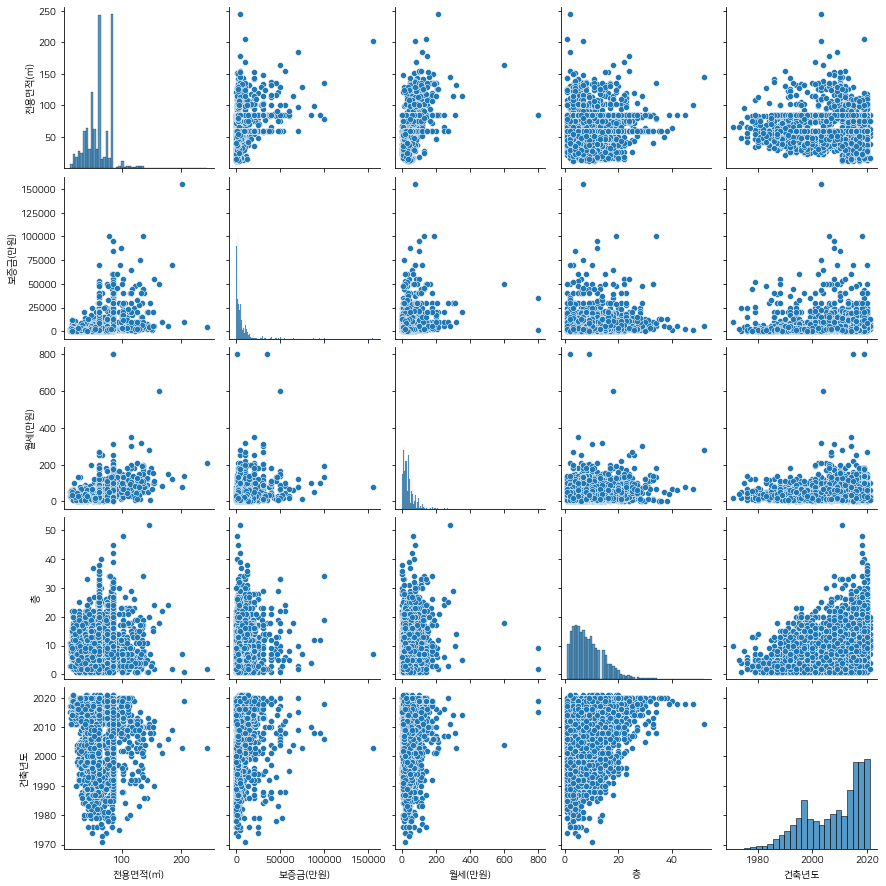

In [18]:
sns.pairplot(월세_train)

C:\Users\enigma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\enigma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


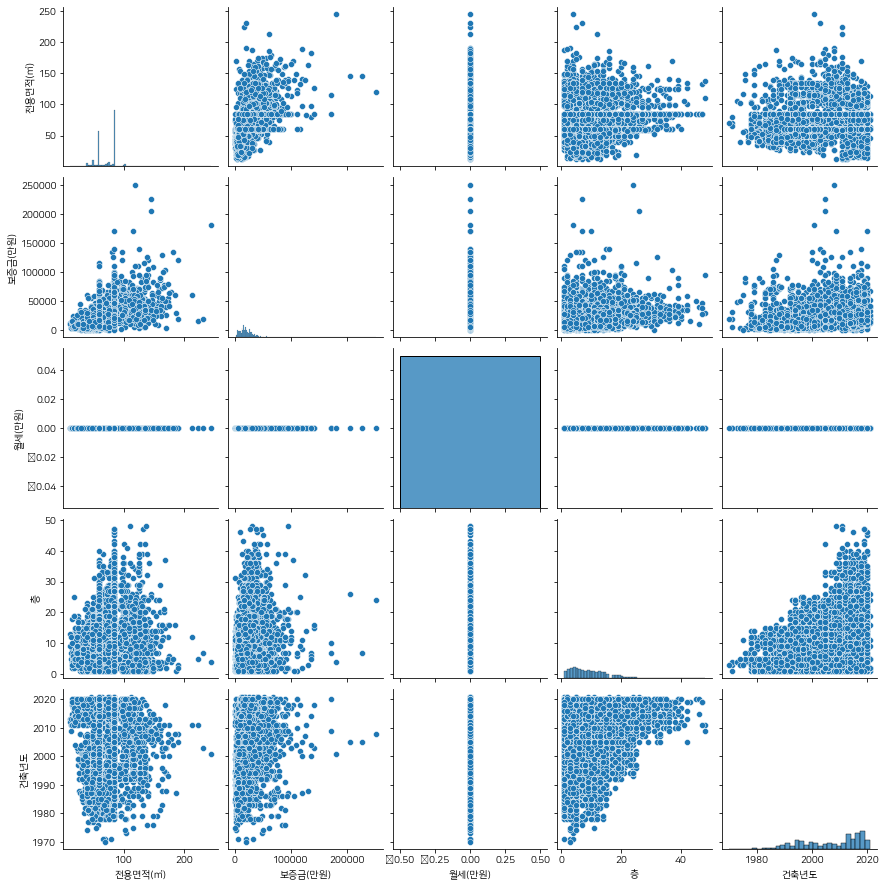

In [21]:
sns.pairplot(전세_train)

# 솔직히 산점도 행렬로는 잘 모르겠습니다

In [25]:
월세_train.corr()

# 월세(만원)와 가장 높은 상관계수를 갖는 변수는 전용면적.

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.379900,0.473753,0.122702,0.044748
보증금(만원),0.379900,1.000000,0.132703,0.131093,0.156173
월세(만원),0.473753,0.132703,1.000000,0.132955,0.044431
층,0.122702,0.131093,0.132955,1.000000,0.252621
건축년도,0.044748,0.156173,0.044431,0.252621,1.000000


In [26]:
전세_train.corr()

# 보증금(만원)과 가장 높은 상관계수를 갖는 변수도 전용면적.

# 즉, 가장 강한 feature는 전용면적이다.

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.533033,NaN,0.146494,0.190064
보증금(만원),0.533033,1.000000,NaN,0.185872,0.227700
월세(만원),NaN,NaN,NaN,NaN,NaN
층,0.146494,0.185872,NaN,1.000000,0.266430
건축년도,0.190064,0.227700,NaN,0.266430,1.000000


4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [40]:
# 관련 모듈 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 월세_train.iloc[:, 3][:, np.newaxis]
y1_train = 월세_train.iloc[:, 5][:, np.newaxis]

X_train.shape
y1_train.shape

C:\Users\enigma\AppData\Local\Temp/ipykernel_14700/1782092719.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = 월세_train.iloc[:, 3][:, np.newaxis]
C:\Users\enigma\AppData\Local\Temp/ipykernel_14700/1782092719.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_train = 월세_train.iloc[:, 5][:, np.newaxis]


(4932, 1)

In [38]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [47]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg_1 = LinearRegression()

lin_reg_1.fit(X_train, y1_train)

LinearRegression()

C:\Users\enigma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


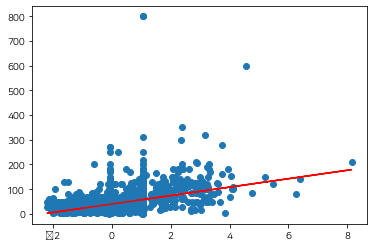

In [48]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r');

In [ ]:
# # 시각화. 체크용입니다.
# plt.scatter(X_train[:, 0], y1_train)
# plt.plot(X_train[:, 0], 
#          lin_reg_1.predict(X_train), 
#          c='r');

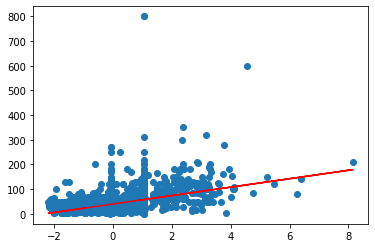

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [52]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_test.iloc[:, 3][:, np.newaxis]
y1_test = 월세_test.iloc[:, 5][:, np.newaxis]

X_test.shape

C:\Users\enigma\AppData\Local\Temp/ipykernel_14700/503269325.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = 월세_test.iloc[:, 3][:, np.newaxis]
C:\Users\enigma\AppData\Local\Temp/ipykernel_14700/503269325.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_test = 월세_test.iloc[:, 5][:, np.newaxis]


(1022, 1)

In [53]:
# X_test 역시 정규화 해주어야 합니다. 주의할점? - test set에는 fit은 안 한다는 것

X_test = scaler.transform(X_test)

In [57]:
# y1_hat에 predict값 할당

y1_hat = lin_reg_1.predict(X_test)

C:\Users\enigma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


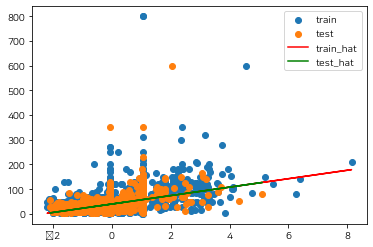

In [58]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r', label='train_hat')
plt.plot(X_test[:, 0], 
         y1_hat, 
         c='g', label='test_hat')

plt.legend();

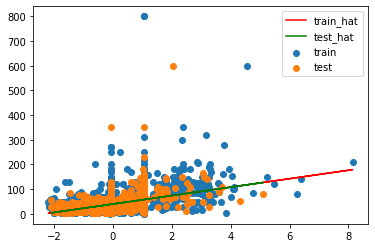

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [60]:
# 관련 모듈 import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [96]:
# 파이프라인 생성
p1 = Pipeline([('scaler', StandardScaler()),
               ('poly', PolynomialFeatures(degree = 4, include_bias = False)),
               ('rdg_reg_1', Ridge(alpha=0.3))])

In [97]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_train.iloc[:, 3][:, np.newaxis]
y2_train = 전세_train.iloc[:, 4]

C:\Users\enigma\AppData\Local\Temp/ipykernel_14700/2000175462.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = 전세_train.iloc[:, 3][:, np.newaxis]


In [98]:
y2_train.shape

(9068,)

In [99]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('rdg_reg_1', Ridge(alpha=0.3))])

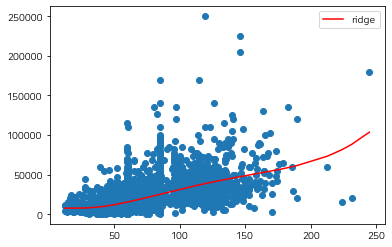

In [100]:
# 시각화. 체크용입니다.
# degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p1.predict(X_train)), 
         c='r', label='ridge')
plt.legend();

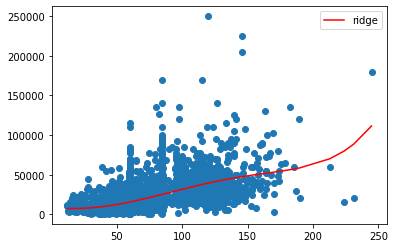

수고하셨습니다.